In [1]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
h5_file = h5py.File('saliencyMapExample.h5', "r")
data = h5_file['saliency']
if "indices" in h5_file:
    indices = np.array(h5_file["indices"], dtype=np.int64)[:, 0]
else:
    indices = np.array(range(0, len(data)))
area_list = get_saliency_area_list(data)
file_ = os.path.split(data_path)[-1]
file_name = os.path.splitext(file_)[0]
plt.figure(0)
plt.plot(indices, area_list)
plt.xlabel("Frame index")
plt.ylabel("Saliency area")
plt.title(file_name)
plt.savefig(save_path)
plt.close(0)


NameError: name 'get_saliency_area_list' is not defined

In [270]:
def read_from_file(file_path):
    in_file = h5py.File(file_path, "r")
    data = in_file['data']
    files = []
    mems = []
    for key in data.attrs.keys():
        files.append(key)
        mems.append(data.attrs[key][0])
    in_file.close()
    return np.array(files), np.array(mems)

def plot_mem_score():
    data_file_1 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem.h5"
    data_file_2 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_ce0_4.h5"
    data_file_3 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_ce0_5.h5"
    data_file_4 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_ce0_6.h5"
    data_file_5 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_ce0_7.h5"
    data_file_6 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_ce0_8.h5"
    data_file_7 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_ce0_9.h5"
    
    data_file_8 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_sal_p30.h5"
    data_file_9 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_asal.h5"
    data_file_10 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_asal_p20.h5"
    data_file_11 = "/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/memento10k_dev_mem_asal_p30_.h5"
    
    
    _, mem_1 = read_from_file(data_file_1)
    _, mem_2 = read_from_file(data_file_2)
    _, mem_3 = read_from_file(data_file_3)
    _, mem_4 = read_from_file(data_file_4)
    _, mem_5 = read_from_file(data_file_5)
    _, mem_6 = read_from_file(data_file_6)
    _, mem_7 = read_from_file(data_file_7)
    _, mem_8 = read_from_file(data_file_8)
    _, mem_9 = read_from_file(data_file_9)
    _, mem_10 = read_from_file(data_file_10)
    _, mem_11 = read_from_file(data_file_11)
    
    sorted_args = np.argsort(mem_1)
    plt.figure(0)
    plt.plot(mem_2[sorted_args])
    plt.plot(mem_1[sorted_args])
    plt.legend(["Cropping based on saliency", "Original"])
    plt.xlabel("Original Mem score from low to high")
    plt.ylabel("Mem score")
    plt.savefig("res.png")
    plt.close()
    return mem_1, mem_2, mem_3, mem_4, mem_5, mem_6, mem_7, mem_8, mem_9, mem_10, mem_11

In [271]:
mem_1, mem_2, mem_3, mem_4, mem_5, mem_6, mem_7, mem_8, mem_9, mem_10, mem_11 = plot_mem_score()

# TABLEAU GRAPH DATA

In [295]:
fixed_crop_size = [[mem_1[i], mem_8[i]] for i in range(min(len(mem_1), len(mem_8)))]
sorted_list = sorted(fixed_crop_size, key=lambda x: x[0])
df_fixed_crop = pd.DataFrame(sorted_list, columns = ['Original', 'Cropped'])

df_fixed_crop['Videos'] = [i for i in range(1, 1501)]
df_fixed_crop.head()

,Original,Cropped,Videos
0,0.557929,0.705399,1
1,0.574135,0.620172,2
2,0.589497,0.753606,3
3,0.593543,0.594495,4
4,0.597098,0.622203,5


In [296]:
df_fixed_crop['Original'].mean() - df_fixed_crop['Cropped'].mean()
df_fixed_crop.mean()

Original      0.779753
Cropped       0.774661
Videos      750.500000
dtype: float64

In [297]:
df_fixed_crop.to_excel('/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/Fixed_crop_size_tracking.xlsx')

<Axes: ylabel='Cropped'>

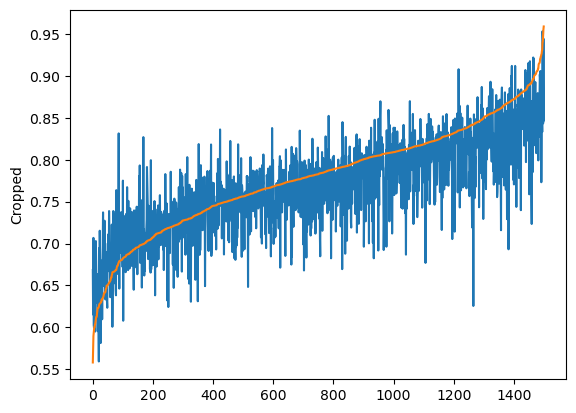

In [52]:
sns.lineplot(df_fixed_crop['Cropped'])
sns.lineplot(df_fixed_crop['Original'])

In [6]:
var_crop_size = [[mem_1[i], mem_9[i]] for i in range(min(len(mem_1), len(mem_9)))]
sorted_list = sorted(var_crop_size, key=lambda x: x[0])
df_var_crop = pd.DataFrame(sorted_list, columns = ['Original', 'Cropped'])

df_var_crop['Videos'] = [i for i in range(1, 1501)]
df_var_crop.head()

,Original,Cropped,Videos
0,0.557929,0.668267,1
1,0.574135,0.615194,2
2,0.589497,0.706718,3
3,0.593543,0.602543,4
4,0.597098,0.599328,5


In [11]:
df_var_crop['Original'].mean() - df_var_crop['Cropped'].mean()

0.013186361603982899

In [30]:
df_var_crop.to_excel('/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/Var_crop_0_pad.xlsx')

In [298]:
df = df_var_crop_30['Cropped'] - df_fixed_crop['Cropped']

In [299]:
sum(df!=0)

159

In [300]:
sum(df)

1.277034061484866

In [301]:
df_fixed_crop[df > 0]

,Original,Cropped,Videos
29,0.632859,0.661716,30
64,0.663128,0.709217,65
98,0.680774,0.717948,99
100,0.682251,0.789319,101
108,0.684239,0.710227,109
...,...,...,...
1408,0.874955,0.747080,1409
1413,0.876107,0.849891,1414
1437,0.882928,0.854888,1438
1478,0.906256,0.874934,1479


In [304]:
x = list(df[df != 0])
len(x)
x.sort()
x

[-0.11525026957194018,
 -0.058675956726074285,
 -0.04852265119552612,
 -0.039823055267333984,
 -0.036736488342285156,
 -0.031052494049072288,
 -0.027627182006836004,
 -0.025076654222276562,
 -0.024267196655273438,
 -0.020639684465196373,
 -0.016846179962158203,
 -0.016272968716091518,
 -0.015092313289642334,
 -0.014538240432739324,
 -0.01200313568115241,
 -0.011213207244872958,
 -0.00972205400466919,
 -0.009557545185089111,
 -0.009438562393188521,
 -0.008933067321777344,
 -0.008854971991644978,
 -0.00876009464263916,
 -0.008698415756225542,
 -0.008544815911187054,
 -0.008515238761901855,
 -0.008192300796508789,
 -0.008151531219482422,
 -0.007406377792358421,
 -0.007334661483764715,
 -0.007273568047417522,
 -0.007166120741102455,
 -0.006601015726725334,
 -0.006511052449544308,
 -0.006038069725036621,
 -0.005618625217013951,
 -0.005597220526801117,
 -0.005455546908908371,
 -0.005214903089735268,
 -0.00478617350260413,
 -0.004100640614827511,
 -0.0038760900497436523,
 -0.00350316365559899

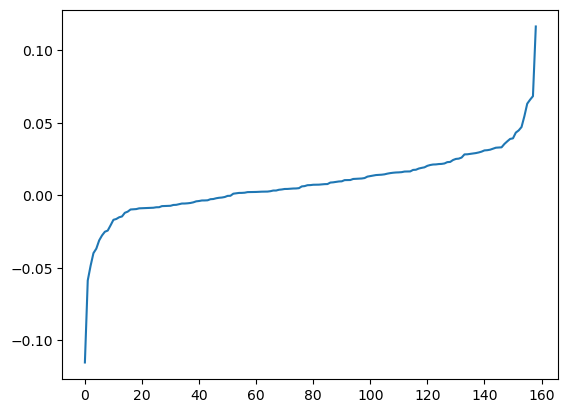

In [294]:
x = list(df[df != 0])
x.sort()
plt.plot(x)

<Axes: ylabel='Cropped'>

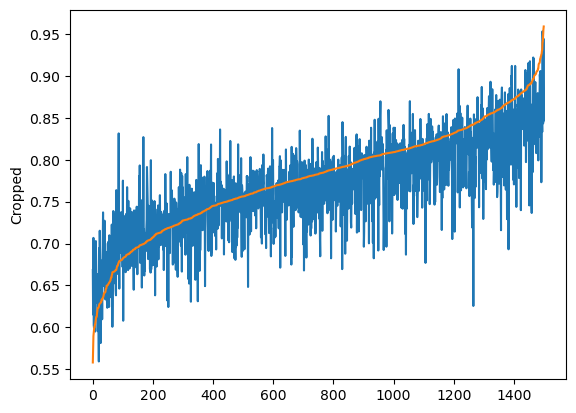

In [53]:
sns.lineplot(df_var_crop['Cropped'])
sns.lineplot(df_var_crop['Original'])

In [173]:
var_crop_size_20_pad = [[mem_1[i], mem_10[i]] for i in range(min(len(mem_1), len(mem_9)))]
sorted_list = sorted(var_crop_size_20_pad, key=lambda x: x[0])
df_var_crop_20 = pd.DataFrame(sorted_list, columns = ['Original', 'Cropped'])

df_var_crop_20['Videos'] = [i for i in range(1, 1501)]
df_var_crop_20.head()

,Original,Cropped,Videos
0,0.557929,0.668267,1
1,0.574135,0.615194,2
2,0.589497,0.706718,3
3,0.593543,0.602543,4
4,0.597098,0.599328,5


In [34]:
df_var_crop_20.to_excel('/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/Var_crop_20_pad.xlsx')

In [44]:
df_1 = df_var_crop_20['Cropped'] - df_var_crop['Cropped']

In [45]:
sum(df_1!=0)

52

<Axes: ylabel='Cropped'>

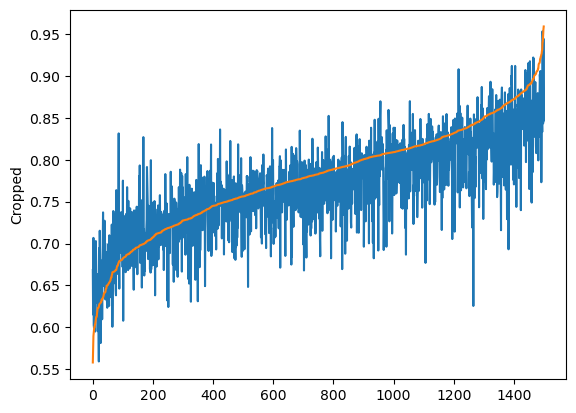

In [54]:
sns.lineplot(df_var_crop_20['Cropped'])
sns.lineplot(df_var_crop_20['Original'])

In [245]:
var_crop_size_30_pad = [[mem_1[i], mem_11[i]] for i in range(min(len(mem_1), len(mem_9)))]
sorted_list = sorted(var_crop_size_30_pad, key=lambda x: x[0])
df_var_crop_30 = pd.DataFrame(sorted_list, columns = ['Original', 'Cropped'])

df_var_crop_30['Videos'] = [i for i in range(1, 1501)]
df_var_crop_30.head()

,Original,Cropped,Videos
0,0.557929,0.705399,1
1,0.574135,0.620172,2
2,0.589497,0.753606,3
3,0.593543,0.594495,4
4,0.597098,0.622203,5


In [246]:
df_var_crop_30['Original'].mean() - df_var_crop_30['Cropped'].mean()
df_var_crop_30['Cropped'].mean()

0.7755123856683255

In [247]:
df_75 = df_var_crop_30[df_var_crop_30['Original'] < 0.75]
df_75['Original'].mean() - df_75['Cropped'].mean()
df_75.mean()

Original      0.703511
Cropped       0.723491
Videos      223.000000
dtype: float64

In [248]:
df_var_crop_30

,Original,Cropped,Videos
0,0.557929,0.705399,1
1,0.574135,0.620172,2
2,0.589497,0.753606,3
3,0.593543,0.594495,4
4,0.597098,0.622203,5
...,...,...,...
1495,0.940649,0.955609,1496
1496,0.941005,0.946049,1497
1497,0.948845,0.852569,1498
1498,0.955653,0.977522,1499


In [249]:
df_30 = df_var_crop_30['Cropped'] - df_fixed_crop['Cropped']
sum(df_30 != 0)

1500

In [250]:
df_var_crop_30.to_excel('/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/Var_crop_30_pad.xlsx')

In [108]:
df_75 = df_var_crop_30[df_var_crop_30['Original'] < 0.65]
df_75.shape

(48, 3)

In [109]:
df_2 = df_var_crop_30['Cropped'] - df_fixed_crop['Cropped']
df_3 = df_75['Cropped'] - df_75['Original']

In [110]:
print(f'Improved: {sum(df_3 > 0)}')
print(f'Not Improved: {sum(df_3 < 0)}')
print(f'Percent Improved: {float(sum(df_3 > 0)/df_75.shape[0])*100}')

Improved: 39
Not Improved: 9
Percent Improved: 81.25


{0.65: 85.41666666666666,
 0.7: 83.13953488372093,
 0.75: 73.03370786516854,
 0.8: 58.770949720670394,
 0.85: 51.73210161662818,
 0.9: 48.670756646216766,
 0.95: 47.79706275033378}

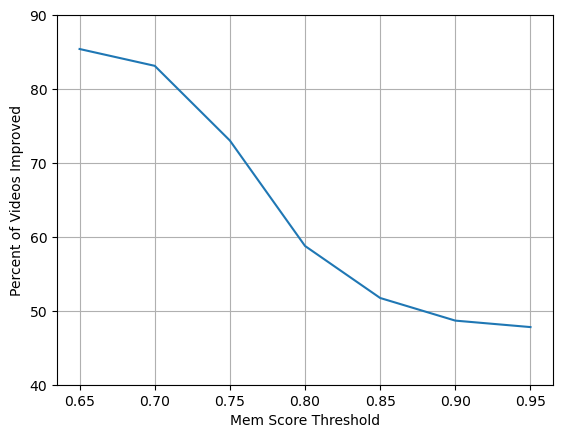

In [251]:
percents_improved = {}
for i in range(65, 100, 5):
    df_75 = df_var_crop_30[df_var_crop_30['Original'] < i/100]
    
    df_3 = df_75['Cropped'] - df_75['Original']
#     percents_improved.append(float(sum(df_3 > 0)/df_75.shape[0])*100)
    percents_improved[i/100] = float(sum(df_3 > 0)/df_75.shape[0])*100

sns.lineplot(percents_improved)
plt.ylabel('Percent of Videos Improved')
plt.xlabel('Mem Score Threshold')
plt.grid()
plt.yticks([i for i in range(40, 100, 10)])
percents_improved

In [72]:
percents_improved

[100.0,
 81.25,
 75.0,
 64.26966292134831,
 49.83240223463687,
 42.34026173979984,
 39.94546693933197,
 39.25233644859813]

<Axes: ylabel='Cropped'>

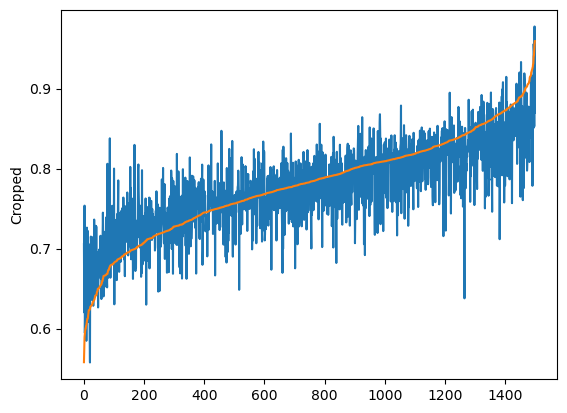

In [302]:
sns.lineplot(df_var_crop_30['Cropped'])
sns.lineplot(df_var_crop_30['Original'])

In [278]:
fix = df

# EVALUATION METRIC

In [279]:
combined_list = [[mem_1[i], mem_11[i]] for i in range(min(len(mem_1), len(mem_8)))]
sorted_list = sorted(combined_list, key=lambda x: x[0])
df = pd.DataFrame(sorted_list, columns = ['Original', 'Cropped'])

original = df['Original']
cropped = df['Cropped']


df['diff'] = df['Cropped'] - df['Original']
df['diff'].iloc[:446].sum()

data_list = list(df['diff'].values)
cumulative_means = np.cumsum(data_list) / np.arange(1, len(data_list) + 1)

df['CumulativeMean'] = cumulative_means

df[df['CumulativeMean'] <= 0].iloc[0]['Original']
df.head(20)

,Original,Cropped,diff,CumulativeMean
0,0.557929,0.705399,0.147470,0.147470
1,0.574135,0.620172,0.046037,0.096754
2,0.589497,0.753606,0.164109,0.119206
3,0.593543,0.594495,0.000952,0.089642
4,0.597098,0.622203,0.025105,0.076735
5,0.600029,0.625145,0.025116,0.068132
6,0.600152,0.627635,0.027484,0.062325
7,0.603332,0.705155,0.101823,0.067262
8,0.603871,0.584654,-0.019217,0.057653
9,0.606562,0.688486,0.081924,0.060080


In [280]:
df[df['Original'] < 0.75]

,Original,Cropped,diff,CumulativeMean
0,0.557929,0.705399,0.147470,0.147470
1,0.574135,0.620172,0.046037,0.096754
2,0.589497,0.753606,0.164109,0.119206
3,0.593543,0.594495,0.000952,0.089642
4,0.597098,0.622203,0.025105,0.076735
...,...,...,...,...
440,0.749528,0.731223,-0.018306,0.020225
441,0.749578,0.740643,-0.008934,0.020159
442,0.749631,0.748577,-0.001053,0.020111
443,0.749855,0.741064,-0.008791,0.020046


Text(0, 0.5, 'Mem Scores')

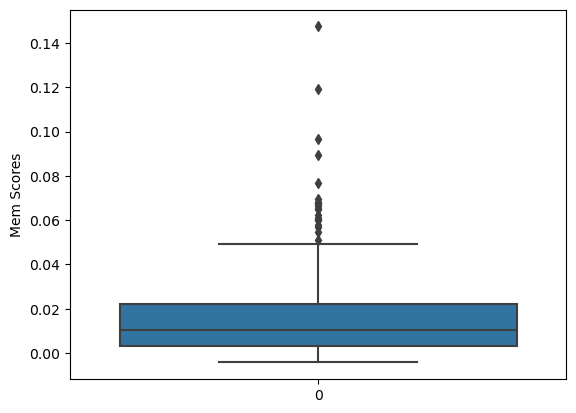

In [281]:
sns.boxplot(df['CumulativeMean'].values)

plt.ylabel('Mem Scores')

In [282]:
def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

outliers = find_outliers_iqr(pd.Series(df['CumulativeMean'].values))

df = df.drop(outliers.index)
df

,Original,Cropped,diff,CumulativeMean
20,0.624698,0.557577,-0.067122,0.045612
21,0.626696,0.705503,0.078807,0.047120
22,0.627613,0.663386,0.035773,0.046627
23,0.627950,0.714933,0.086983,0.048309
24,0.628446,0.704206,0.075760,0.049407
...,...,...,...,...
1495,0.940649,0.955609,0.014960,-0.004146
1496,0.941005,0.946049,0.005044,-0.004140
1497,0.948845,0.852569,-0.096276,-0.004202
1498,0.955653,0.977522,0.021869,-0.004184


Text(0, 0.5, 'Mem Scores')

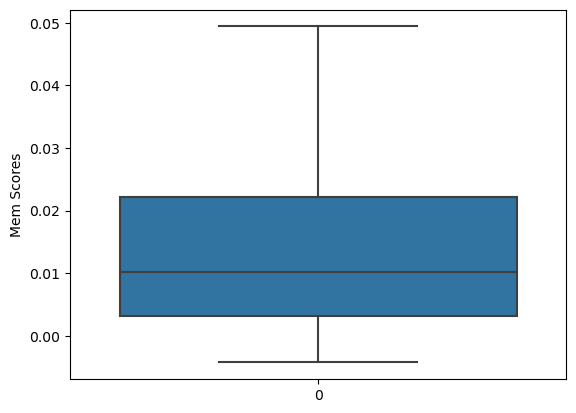

In [283]:
sns.boxplot(df['CumulativeMean'].values)

plt.ylabel('Mem Scores')

In [284]:
df = df[df['CumulativeMean'] < 0.04]
df['Videos'] = [i for i in range(1, df.shape[0]+1)]

df
# sns.boxplot(df['CumulativeMean'].values)

/var/folders/gw/dh8lthdx7vjfxqcrngp0q75w0000gn/T/ipykernel_30608/3415686376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Videos'] = [i for i in range(1, df.shape[0]+1)]


,Original,Cropped,diff,CumulativeMean,Videos
59,0.656119,0.650599,-0.005520,0.039922,1
60,0.658701,0.646678,-0.012023,0.039071,2
61,0.659364,0.682282,0.022919,0.038810,3
62,0.659492,0.707703,0.048211,0.038959,4
63,0.662319,0.744840,0.082520,0.039640,5
...,...,...,...,...,...
1495,0.940649,0.955609,0.014960,-0.004146,1437
1496,0.941005,0.946049,0.005044,-0.004140,1438
1497,0.948845,0.852569,-0.096276,-0.004202,1439
1498,0.955653,0.977522,0.021869,-0.004184,1440


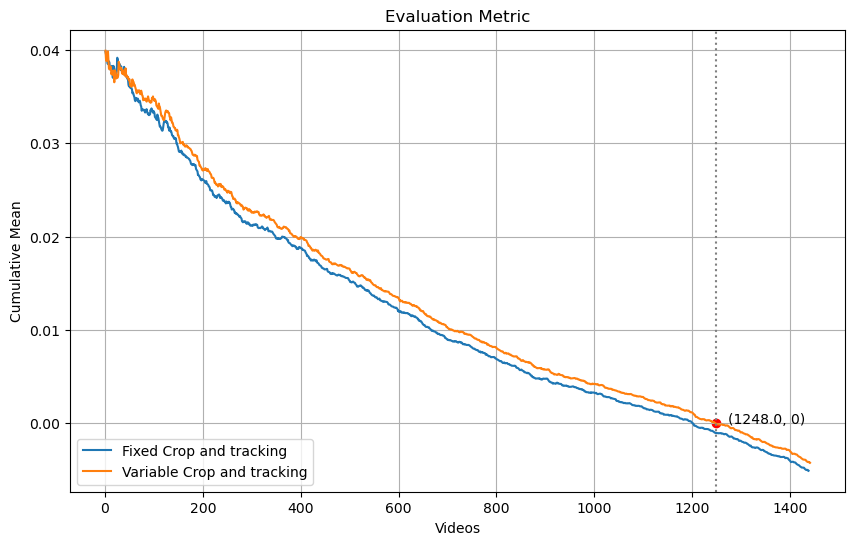

In [286]:


plt.figure(figsize=(10, 6))
# sns.lineplot(x=range(1, len(data_list) + 1), y=cumulative_means)
sns.lineplot(x=[i for i in range(1, 1439)], y = fix['CumulativeMean'], label = 'Fixed Crop and tracking')
sns.lineplot(x=[i for i in range(1, 1442)], y=df['CumulativeMean'], label = 'Variable Crop and tracking')

vertical_line_x = df[df['CumulativeMean'] <= 0].iloc[0]['Videos']
plt.axvline(vertical_line_x, color='grey', linestyle='dotted')

cumulative_mean_at_dotted_line = df[df['CumulativeMean'] <= 0].iloc[0]['CumulativeMean']
plt.scatter(x = vertical_line_x, y = cumulative_mean_at_dotted_line, color = 'Red')

plt.text(vertical_line_x + 25, 0, f'({vertical_line_x}, {0})', color='black')

# vertical_line_x_fix = fix[fix['CumulativeMean'] <= 0].iloc[0]['Videos']
# plt.axvline(vertical_line_x_fix, color='grey', linestyle='dotted')

# cumulative_mean_at_dotted_line_fix = fix[fix['CumulativeMean'] <= 0].iloc[0]['CumulativeMean']
# plt.scatter(x = vertical_line_x, y = cumulative_mean_at_dotted_line_fix, color = 'Blue')

# plt.text(vertical_line_x_fix - 100, 0, f'({vertical_line_x_fix}, {0})', color='black')


# custom_xticks = [float(i/100) for i in range(55, 100, 5)]
# plt.xticks(custom_xticks)

plt.xlabel('Videos')
plt.ylabel('Cumulative Mean')
plt.title('Evaluation Metric')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

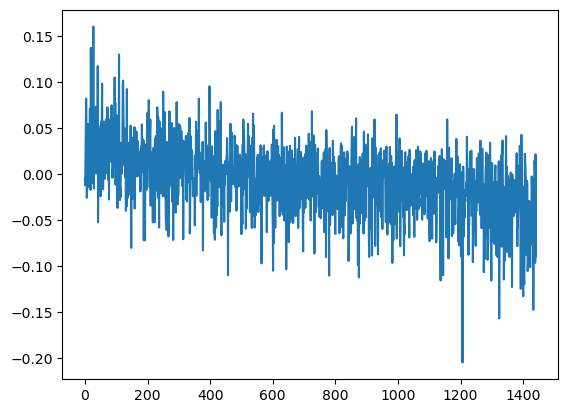

In [243]:
sns.lineplot(df['diff'].values)

Text(0, 0.5, 'Mem Scores')

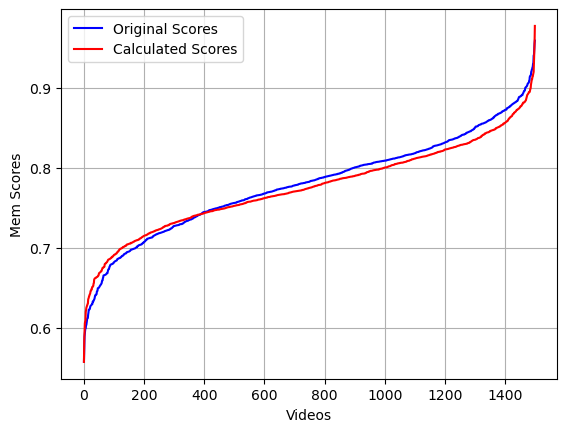

In [244]:
cropped = cropped.values
cropped.sort()

sns.lineplot(original, color = 'blue', label = 'Original Scores')
sns.lineplot(cropped, color = 'red', label = 'Calculated Scores')
plt.grid(True)
plt.xlabel('Videos')
plt.ylabel('Mem Scores')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(width, height))
sns.lineplot(original, color = 'blue', label = 'Original Scores', ax=axes[0, 0])
sns.lineplot(cropped, color = 'red', label = 'Calculated Scores', ax=axes[0, 0])


In [27]:
import pandas as pd

data = {'VideoNumber': [i for i in range(1, 1501)], 'Original': mem_1, 'SaliencyBased': mem_2}
df = pd.DataFrame(data)

# Step 5: Write the DataFrame to an Excel file
output_file = '/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/output.xlsx'  # Change this to the desired file name
df.to_excel(output_file, index=False)

In [28]:
df

,VideoNumber,Original,SaliencyBased
0,1,0.817509,0.796383
1,2,0.839757,0.824978
2,3,0.771978,0.765373
3,4,0.751054,0.781145
4,5,0.763588,0.743160
...,...,...,...
1495,1496,0.804832,0.794772
1496,1497,0.861798,0.866395
1497,1498,0.726355,0.666439
1498,1499,0.814910,0.806778


In [29]:
# Combine the i-th index elements from both lists into a new list
combined_list = [[mem_1[i], mem_2[i]] for i in range(min(len(mem_1), len(mem_2)))]

print(combined_list)


[[0.8175093650817871, 0.7963832378387451], [0.839756965637207, 0.8249782456292046], [0.7719784312778049, 0.7653729120890299], [0.7510541280110677, 0.7811452017890083], [0.763588375515408, 0.743160088857015], [0.7620346811082628, 0.7876344786749946], [0.8030753135681152, 0.7693362236022949], [0.8073938488960266, 0.7896142601966858], [0.8321833080715604, 0.7974079979790581], [0.8725322617424859, 0.8383686807420518], [0.8746101061503092, 0.8656793700324165], [0.8306923866271972, 0.781035327911377], [0.8294736014472114, 0.81348631117079], [0.8304335806104872, 0.8001124593946669], [0.8429319593641493, 0.7876317765977647], [0.792120721605089, 0.8072483274671767], [0.851722240447998, 0.7974637031555176], [0.8772353172302246, 0.8256411552429199], [0.7711485028266907, 0.7371735572814941], [0.8939373228285048, 0.790810743967692], [0.8137565612792969, 0.8699517250061035], [0.8065412839253744, 0.802639537387424], [0.7456622123718262, 0.73499596118927], [0.7446918964385987, 0.7726154804229737], [0.

In [30]:
sorted_list = sorted(combined_list, key=lambda x: x[0])

print(sorted_list)

[[0.5579289860195584, 0.6682670381334093], [0.5741351975335015, 0.615194108751085], [0.5894970893859863, 0.7067182660102844], [0.593542840745714, 0.6025434070163302], [0.5970980326334635, 0.5993275112575955], [0.6000290976630317, 0.6140133010016547], [0.600151538848877, 0.6346152305603028], [0.6033319473266602, 0.6994164943695068], [0.60387122631073, 0.5948785543441772], [0.6065617667304145, 0.6913824611239963], [0.6094545841217041, 0.7028751850128174], [0.6120825343661838, 0.6800372865464952], [0.6121917300754123, 0.6562421586778429], [0.612602710723877, 0.6325053215026856], [0.6167608896891276, 0.6444851557413737], [0.6191939830780029, 0.6290847778320312], [0.6227583355373807, 0.663294792175293], [0.6230319738388062, 0.595268726348877], [0.6232000986735026, 0.6205104986826578], [0.6233479380607605, 0.6044644117355347], [0.6246983740064833, 0.5591351191202799], [0.6266963958740235, 0.6944186687469482], [0.6276134914822049, 0.6445866690741645], [0.6279496669769287, 0.7152481555938721],

In [31]:
df_1 = pd.DataFrame(sorted_list, columns = ['Original', 'SalaiencyBased'])

In [33]:
df_1['Videos'] = [i for i in range(1, 1501)]

In [34]:
df_1

,Original,SalaiencyBased,Videos
0,0.557929,0.668267,1
1,0.574135,0.615194,2
2,0.589497,0.706718,3
3,0.593543,0.602543,4
4,0.597098,0.599328,5
...,...,...,...
1495,0.940649,0.953490,1496
1496,0.941005,0.942142,1497
1497,0.948845,0.843494,1498
1498,0.955653,0.944632,1499


In [35]:
# Step 5: Write the DataFrame to an Excel file
output_file = '/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/output.xlsx'  # Change this to the desired file name
df_1.to_excel(output_file, index=False)

In [78]:
mem_1.sort()

In [80]:
mem_1

array([0.55792899, 0.5741352 , 0.58949709, ..., 0.94884491, 0.95565319,
       0.95915598])

In [89]:
import json

# Step 1: Read the JSON file
file_path = "/Users/vaibhavmudgal/VideoMemThsis/memento_dev_data.json"
with open(file_path, "r") as json_file:
    data = json.load(json_file)

In [92]:
scores = [0]*1500

for i in range(1500):
    scores[i] = data[i]['mem_score']

scores.sort()

Text(0, 0.5, 'Mem Scores')

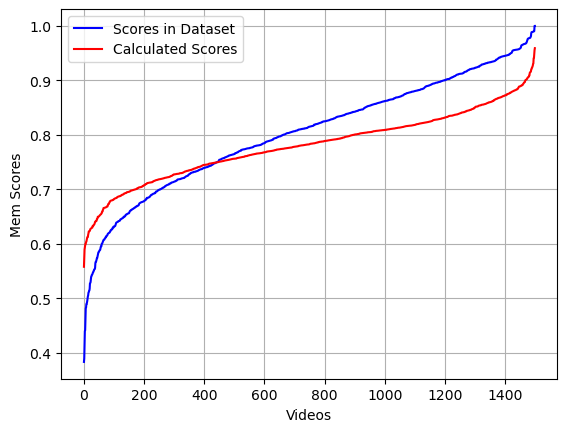

In [99]:
sns.lineplot(scores, color = 'blue', label = 'Scores in Dataset')
sns.lineplot(mem_1, color = 'red', label = 'Calculated Scores')
plt.grid(True)
plt.xlabel('Videos')
plt.ylabel('Mem Scores')

In [95]:
df_scores_diff = pd.DataFrame(scores, columns = ['OriginalScore'])

In [96]:
df_scores_diff['CalculatedScore'] = mem_1

In [98]:
df_scores_diff.to_excel('/Users/vaibhavmudgal/VideoMemThsis/Qings_mem_scores/output_OrignalVScalc.xlsx')